In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

sp.init_printing(use_unicode=True)

In [90]:
class PIP:
    def __init__(self, p, symbols, f, getSI):
        self.parameters = p
        self.symbols = symbols
        self.f = f
        self.getSI = getSI

    def getPIP(self,
        alpha_res = np.linspace(1,1.5,100),
        alpha_mut = np.linspace(1,1.5,100)):
        
        s, i = np.array([self.getSI(x) for x in alpha_res]).transpose()
        a1,a2 = np.meshgrid(alpha_res, alpha_mut)
        l = len(alpha_mut)
        s=s.repeat(l).reshape((l,l)).transpose()
        i=i.repeat(l).reshape((l,l)).transpose()

        sol = np.empty((l**2))
        for counter, (res,mut,s,i) in enumerate(zip(a1.flatten(), a2.flatten(),s.flatten(), i.flatten())):
            sol[counter] = self.f(res,mut,s,i)
        sol = sol.reshape((l,l))
        h = plt.contourf(alpha_res,alpha_mut, sol)
        plt.axis('scaled')
        plt.colorbar()
        plt.show()

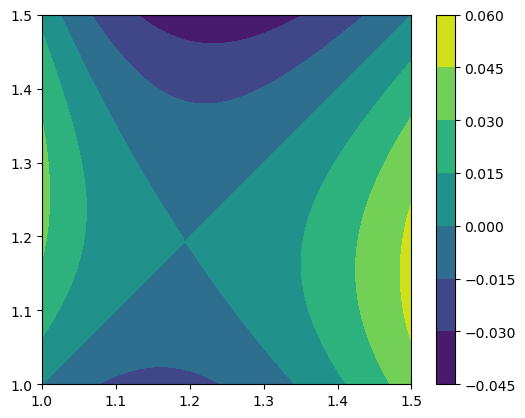

In [94]:
p = b,d,t,c,k = 2.0, 0.5,0.4,1.0,50.0 
symbols = S, I = sp.symbols('S I')

def f(a_res, a_mut, S, I):
    return a_mut/(a_mut+c)*S - (d + (S+I)/k + a_mut + t)

def getSI(a):
    dS = b*S + b*I - (d + (S + I)/k) * S - a/(a+c)*S*I + t*I
    dI = a/(a+c)*S*I -(d+(S+I)/k + a + t)*I
    A = sp.solve([dS,dI], [S,I])
    return [x for x in A if (x[0] > 0 and x[1] >0)][0]


model = PIP(p, symbols, f, getSI)
model.getPIP()

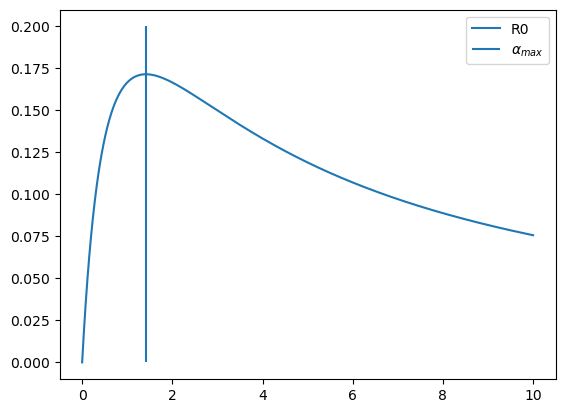

In [95]:
b = lambda a, c : a/(a+c)
R0 = lambda d , a, t, c: b(a,c)/(d+a+t)
alpha = np.linspace(0.0001,10,1000)
r_vals = R0(1,alpha,1,1)
fig, ax = plt.subplots()
ax.plot(alpha, r_vals, label="R0")
ax.vlines(np.sqrt(1*(1+1)),0,0.2, label="$\\alpha_{max}$")
ax.legend()